In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import numpy as np
from vmc import VMCvec, VMC
from trial_wavefunctions import helium_1_param_vec, helium_1_param


psi = helium_1_param_vec

'''Initial parameters'''
alpha = np.ones(1000) * 0.38
alpha_iterations = 50
N_metropolis = 10000
random_walkers = 1
gamma = 0.5

energy_plot = np.array([])
alpha_plot = np.array([])
variance_plot = np.array([])

for i in range(alpha_iterations):
    
    sim = VMCvec(alpha, psi)
    E = 0
    E2 = 0
    dE_dalpha = 0
    Eln = 0
    ln = 0
    rejection_ratio = 0
    alpha_step = 0.01

    E_met, E2_met, Eln_met, ln_met, rejections_met = sim.metropolis(N_metropolis)
    E = np.sum(E_met) / len(E_met)
    E2 = np.sum(E2_met) / len(E2_met)
    Eln = np.sum(Eln_met) / len(Eln_met)
    ln = np.sum(ln_met) / len(ln_met)
    rejection_ratio = np.sum(rejections_met) / len(rejections_met) 

    '''Define next alpha'''
    dE_dalpha = 2 * (Eln - E * ln)
    print('Alpha: ', alpha[0], '<E>: ', E, 'VarE: ', E2 - E **2, 'ratio = ', rejection_ratio)
    #alpha = al pha + alpha_step
    alpha = alpha - gamma * dE_dalpha

    '''Plot'''    
    energy_plot = np.append(energy_plot, E)
    alpha_plot = np.append(alpha_plot, alpha)
    variance_plot = np.append(variance_plot, E2-E**2)

KeyboardInterrupt: 

In [ ]:
# Standard loop
psi = helium_1_param
    
'''Initial parameters'''
alpha = 0.38
alpha_iterations = 50
N_metropolis = 10000
random_walkers = 5
gamma = 0.5

energy_plot = np.array([])
alpha_plot = np.array([])
variance_plot = np.array([])

for i in range(alpha_iterations):
    
    sim = VMC(alpha, psi)
    E = 0
    E2 = 0
    dE_dalpha = 0
    Eln = 0
    ln = 0
    rejection_ratio = 0
    alpha_step = 0.01

    for j in range(random_walkers): #We use more than one random_walkers in case one gets stuck at some X
        E_met, E2_met, Eln_met, ln_met, rejections_met = sim.metropolis(N_metropolis)
        E += E_met/random_walkers
        E2 += E2_met/random_walkers
        Eln += Eln_met/random_walkers
        ln += ln_met/random_walkers
        rejection_ratio += rejections_met/random_walkers 

    '''Define next alpha'''
    dE_dalpha = 2 * (Eln - E * ln)
    print('Alpha: ', alpha, '<E>: ', E, 'VarE: ', E2 - E **2, 'ratio = ', rejection_ratio)
    #alpha = alpha + alpha_step
    alpha = alpha - gamma * dE_dalpha

    '''Plot'''    
    energy_plot = np.append(energy_plot, E)
    alpha_plot = np.append(alpha_plot, alpha)
    variance_plot = np.append(variance_plot, E2-E**2)


AxisError: axis 0 is out of bounds for array of dimension 0

### Analytical expressions using sympy

In [1]:
from sympy import *
import math

In [2]:
x1, y1, z1 = symbols('x_1 y_1 z_1')
x2, y2, z2 = symbols('x_2 y_2 z_2')
r1, r2, r1_, r2_, r12 = symbols('r_1, r_2, r1_, r2_, r12')
init_printing(use_unicode=True)

In [7]:
alpha1, alpha2, alpha3, alpha4 = symbols('alpha_1 alpha_2 alpha_3 alpha_4')

In [8]:
alpha1

In [9]:
r1 = (x1, y1, z1)
r2 = (x2, y2, z2)

In [10]:
r1_ = sqrt(x1 ** 2 + y1 **2 + z1 **2)
r2_ = sqrt(x2 ** 2 + y2 **2 + z2 **2)

In [11]:
r12 = sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2)

In [12]:
G = exp(-2 * (r1_ + r2_))
M = 1 + 1/2 * r12 * exp(-alpha1*r12)
H = 1 + alpha2 * (r1_ b+ r2_)*(r12) + alpha3 * (r1_ - r2_) ** 2 - alpha4 * r12

SyntaxError: invalid syntax. Perhaps you forgot a comma? (589993173.py, line 3)

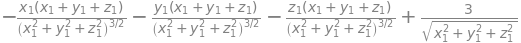

In [16]:
diff((x1 + y1 + z1)/r1_, x1) + diff((x1 + y1 + z1)/r1_, y1) + diff((x1 + y1 + z1)/r1_, z1)

In [ ]:
def gradient_1(exp):
    return simplify(diff(exp, x1) + diff(exp, y1) + diff(exp, z1))

def gradient_2(exp):
    return simplify(diff(exp, x2) + diff(exp, y2) + diff(exp, z2))

In [21]:
init_printing()

In [23]:
init_session()

IPython console for SymPy 1.12 (Python 3.12.3-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



In [27]:
sub_terms = [G, M, H]
grad_1s = [gradient_1(i) for i in sub_terms]
grad_2s = [gradient_2(i) for i in sub_terms]


In [ ]:
laps_1s = [gradient_1(i) for i in grad_1s]

In [62]:
exp = sum(grad_1s)

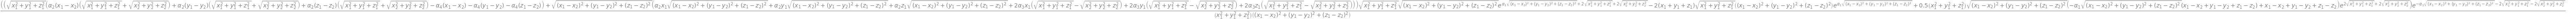

In [64]:
simplify(exp)

In [54]:
laps_2s = [gradient_2(i) for i in grad_2s]

In [58]:
import sympy as sympy

In [60]:
pprint(laps_1s[2])

  ⎛   _________________ ⎛             ⎛   _________________      _____________
  ⎜  ╱   2     2     2  ⎜             ⎜  ╱   2     2     2      ╱   2     2   
- ⎝╲╱  x₁  + y₁  + z₁  ⋅⎝α₂⋅(x₁ - x₂)⋅⎝╲╱  x₁  + y₁  + z₁   + ╲╱  x₂  + y₂  + 
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              
                                                                              

____⎞                ⎛   _________________      _________________⎞            
  2 ⎟                ⎜  ╱   2     2     2      ╱   2     2     2 ⎟            
z₂  ⎠ + α₂⋅(y₁ - y₂)⋅⎝╲╱  x₁  + y₁  + z₁   + ╲╱  x₂  + y₂  + z₂  ⎠ + α₂⋅(z₁ - 
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                   